# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
# MADE BY PIYUSH GOEL
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
df = pd.read_csv(f'Data/spam.csv', encoding='latin-1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


# Data Cleaning

In [6]:
def find_missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percentage = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False)
    return pd.concat([total,percentage] , axis = 1 , keys = ['Total' , 'Percent'])
find_missing_data(df)

,Total,Percent
Unnamed: 4,5566,0.998923
Unnamed: 3,5560,0.997846
Unnamed: 2,5522,0.991027
v1,0,0.000000
v2,0,0.000000


In [7]:
df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)
df.rename(columns = {"v1" : "labels", "v2":"messages"},inplace = True)

# EDA

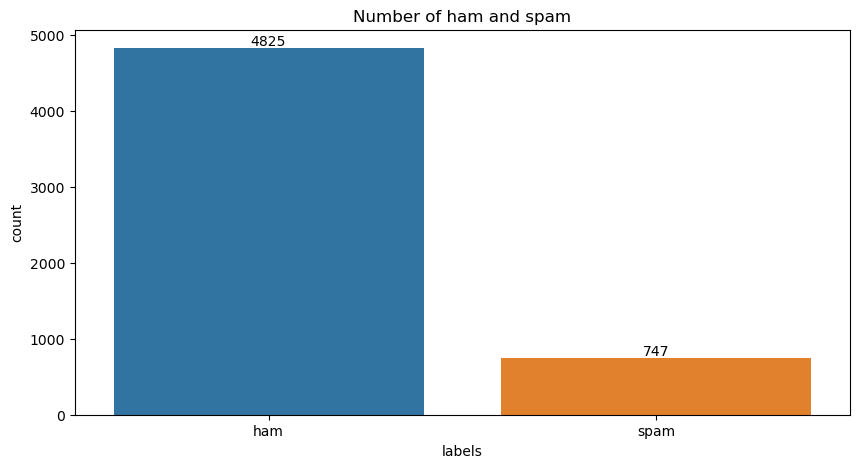

In [8]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df.labels)
plt.title('Number of ham and spam')
ax.bar_label(ax.containers[0])
plt.show()

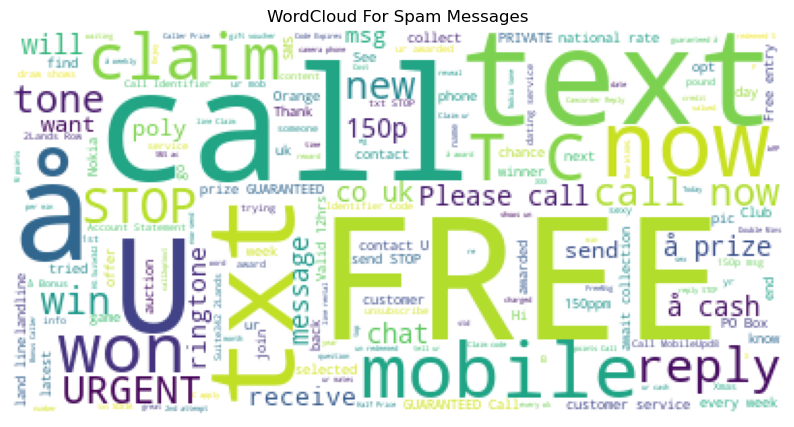

In [9]:
spam_messages = df[df['labels'] == 'spam']

plt.figure(figsize=(10,15))
plt.imshow(WordCloud(background_color = 'white').generate(" ".join(spam_messages.messages)))
plt.axis("off")
plt.title("WordCloud For Spam Messages")
plt.show() 

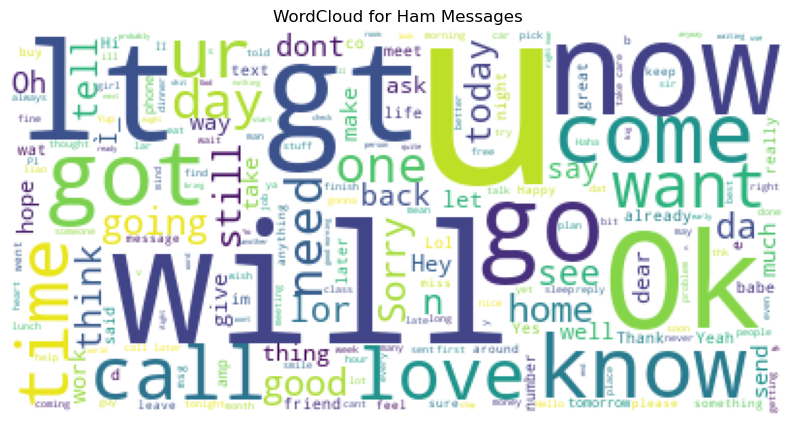

In [10]:
ham_messages = df[df['labels'] == 'ham']

plt.figure(figsize=(10,15))
plt.imshow(WordCloud(background_color = 'white').generate(" ".join(ham_messages.messages)))
plt.axis("off")
plt.title("WordCloud for Ham Messages")
plt.show() 

# Data Preparation

In [11]:
#Converting the Spam an Ham into binary labels
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

train = df.copy()
train['labels'] = encoder.fit_transform(train['labels'])

In [12]:
train

,labels,messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [13]:
X = train["messages"]
y = train["labels"]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (4457,)
X Test  :  (1115,)
Y Train :  (4457,)
Y Test  :  (1115,)


In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [16]:
# Tokenizing Words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_sequence = 150
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence)

# Model Building and Training 

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Conv1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras.preprocessing import sequence

In [18]:
# Building CNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=max_sequence))
model.add(Conv1D(filters=32, kernel_size=3, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(rate=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 64)           507584    
                                                                 
 conv1d (Conv1D)             (None, 148, 32)           6176      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 513,793
Trainable params: 513,793
Non-trainable params: 0
__________________________________________________

In [19]:
# Training and Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_padded, y_train, epochs=10, batch_size=16, validation_data=(X_test_padded, y_test))

Epoch 1/10
279/279 [==============================] - 4s 7ms/step - loss: 0.3137 - accuracy: 0.8910 - val_loss: 0.0949 - val_accuracy: 0.9740
Epoch 2/10
279/279 [==============================] - 2s 5ms/step - loss: 0.0629 - accuracy: 0.9816 - val_loss: 0.0484 - val_accuracy: 0.9857
Epoch 3/10
279/279 [==============================] - 1s 5ms/step - loss: 0.0229 - accuracy: 0.9937 - val_loss: 0.0392 - val_accuracy: 0.9910
Epoch 4/10
279/279 [==============================] - 1s 5ms/step - loss: 0.0089 - accuracy: 0.9982 - val_loss: 0.0381 - val_accuracy: 0.9910
Epoch 5/10
279/279 [==============================] - 1s 5ms/step - loss: 0.0049 - accuracy: 0.9989 - val_loss: 0.0368 - val_accuracy: 0.9928
Epoch 6/10
279/279 [==============================] - 1s 5ms/step - loss: 0.0027 - accuracy: 0.9996 - val_loss: 0.0438 - val_accuracy: 0.9910
Epoch 7/10
279/279 [==============================] - 1s 5ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0442 - val_accuracy: 0.9919
Epoch 

# Results

In [20]:
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test accuracy: {accuracy:.4f}")

35/35 [==============================] - 0s 6ms/step - loss: 0.0518 - accuracy: 0.9892
Test accuracy: 0.9892


In [22]:
predictions = model.predict(X_test_padded)
pred_labels = (predictions > 0.5).astype(int)

pred_df = pd.DataFrame({'Text': X_test, 'Actual': y_test, 'Predicted': pred_labels.flatten()})
pred_df


35/35 [==============================] - 0s 5ms/step


,Text,Actual,Predicted
4405,As one of our registered subscribers u can ent...,1,1
240,Tomarrow final hearing on my laptop case so i ...,0,0
4261,You'll never believe this but i have actually ...,0,0
3043,Let me know how it changes in the next 6hrs. I...,0,0
924,Actually i deleted my old website..now i m blo...,0,0
...,...,...,...
2604,You call times job today ok umma and ask them ...,0,0
1187,There's no point hangin on to mr not right if ...,0,0
971,"Haha awesome, omw back now then",0,0
1952,Nah im goin 2 the wrks with j wot bout u?,0,0
